In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lpf
from integral import integral

In [2]:
df = pd.read_csv("memdata_TSND121-13121423_2019-05-20.csv", header=None,
                 names=['item', 't', 'acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y', 'omega_z'])

In [3]:
df.head()

,item,t,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
0,ags,51657683,2508,10181,1854,557,1804,-1670
1,ags,51657684,2508,10162,1910,538,1780,-1651
2,ags,51657685,2417,10164,1839,532,1773,-1639
3,ags,51657686,2386,10142,1891,514,1755,-1615
4,ags,51657687,2376,10110,1871,490,1737,-1590


In [4]:
df.describe()

,t,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
count,6.813000e+04,68130.000000,68130.000000,68130.000000,68130.000000,68130.000000,68130.000000
mean,5.169175e+07,4208.410230,3896.143711,1893.761617,584.288654,-395.946499,119.065551
std,1.966758e+04,5395.814869,8896.314606,2357.702830,4479.194616,2450.534206,17098.397803
min,5.165768e+07,-8055.000000,-10064.000000,-3384.000000,-8058.000000,-10902.000000,-32603.000000
25%,5.167472e+07,-743.000000,-5770.000000,-69.000000,-2796.000000,-1945.000000,-14261.000000
50%,5.169175e+07,5022.000000,7723.000000,2174.000000,-83.000000,-366.000000,-84.000000
75%,5.170878e+07,8858.000000,10850.000000,3607.000000,3874.000000,1048.000000,14272.500000
max,5.172581e+07,15137.000000,21202.000000,9527.000000,13374.000000,10310.000000,32451.000000


In [5]:
z = np.array(df['omega_z'])/100

In [6]:
zeta0 =  lpf.lpfilter(z, 50, rmdc=False)
zeta = lpf.lpfilter(z, 50)

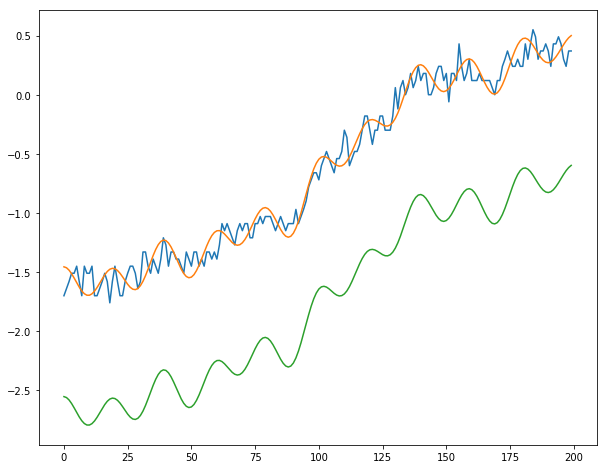

In [7]:
plt.figure(figsize=(10,8))
plt.plot(z[1000:1200])
plt.plot(zeta0[1000:1200])
plt.plot(zeta[1000:1200])
plt.show()

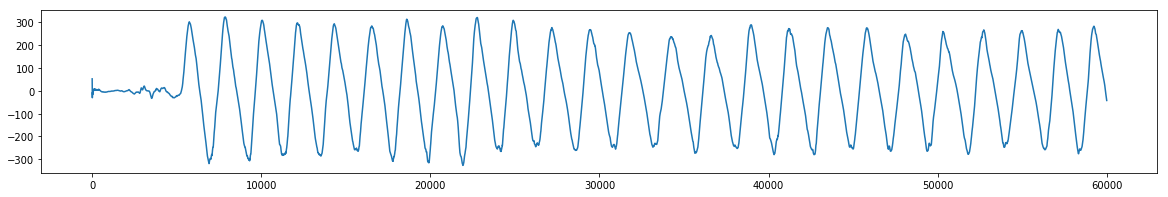

In [8]:
plt.figure(figsize=(20,3))
plt.plot(zeta[:60001])
plt.show()

In [9]:
theta = integral(zeta, 0, 0, 60001)
#積分してθを求めるプログラムを自分で組め

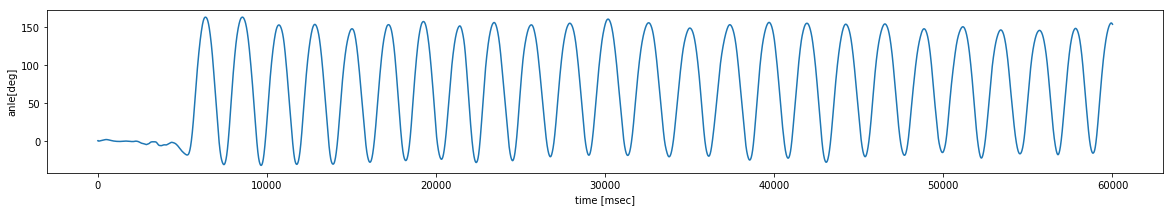

In [10]:
plt.figure(figsize=(20,3))
plt.plot(theta)
plt.xlabel('time [msec]')
plt.ylabel('anle[deg]')
plt.show()

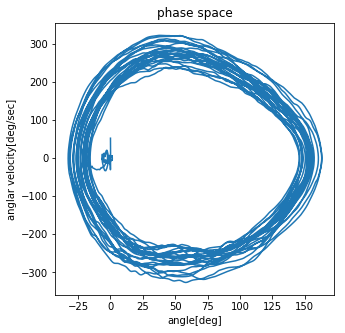

In [11]:
plt.figure(figsize=(5,5))
plt.plot(theta[0:60001], zeta[0:60001])
plt.title('phase space')
plt.xlabel('angle[deg]')
plt.ylabel('anglar velocity[deg/sec]')
plt.show()

In [12]:
import matplotlib.animation as anim
%matplotlib nbagg

<IPython.core.display.Javascript object>


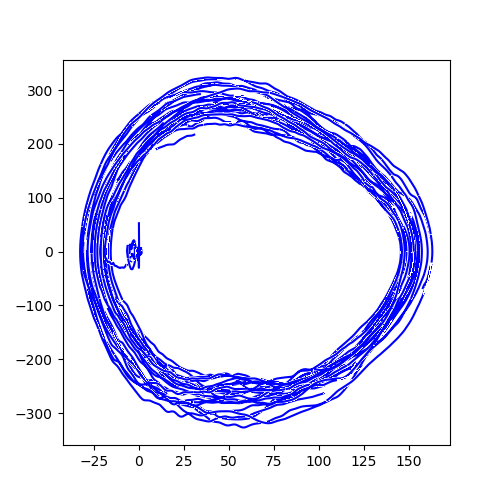

In [14]:
fig = plt.figure(figsize=(5,5))
ims = []
for i in range(0, 60000, 100):
    im = plt.plot(theta[0:i], zeta[0:i], c="blue")
    ims.append(im)
ani = anim.ArtistAnimation(fig, ims, interval=50)
plt.show()